# Evaluating Classifiers

In [272]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [11]:
#X, y = make_moons(n_samples=2000, noise=0.3, random_state=42)

In [343]:
df2 = pd.read_csv('pumps.csv',\
                 index_col=0)

df3 = pd.read_csv('pumps_y.csv',\
                 index_col=0)

df4 = df3.join(df2)

df5 = df4[df4.construction_year > 1000]

df6 = df5[df5.status_group != 'functional needs repair']

In [344]:
X=df5[['region_code']].to_numpy()
y=df5[['quantity']].to_numpy()
y2 = list(y)
y,labels = pd.factorize(y[:,0])
y,labels

X.shape, y.shape



((38691, 1), (38691,))

In [345]:
y.mean()

0.6514434881496989

In [346]:
y2 = 1-y.mean()
y2

0.3485565118503011

In [347]:
X

array([[11],
       [20],
       [21],
       ...,
       [ 3],
       [11],
       [ 5]], dtype=int64)

In [348]:
X.mean()

15.706495050528547

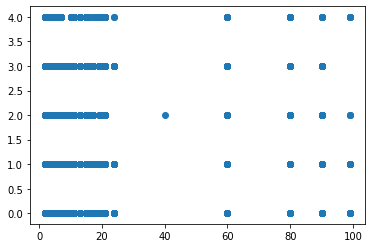

In [349]:
#plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(X[:,0], y)

Split training and test data

In [351]:

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

m = LogisticRegression(solver='lbfgs')
#m = LogisticRegression(solver='lbfgs')
m.fit(X, y)
m.score(X, y)  # gives an accuracy (0.0 .. 1.0)

C:\Users\casti\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5772401850559562

In [352]:
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [353]:
Xtrain

array([[16],
       [ 5],
       [20],
       ...,
       [20],
       [15],
       [20]], dtype=int64)

In [161]:


#from sklearn.model_selection import train_test_split



In [354]:
from sklearn.metrics import confusion_matrix

In [355]:
ypred = m.predict(Xtest)
ypred
np.unique(ypred)

array([0], dtype=int64)

In [356]:
import seaborn as sns

cm = confusion_matrix(ytest, ypred) #also works for 3+ categories
#great for heatmaps with seaborn
plt.figure(figsize=(10, 7))
#sns.heatmap(cm, annot=True)
cm

array([[4465,    0,    0,    0,    0],
       [2122,    0,    0,    0,    0],
       [ 674,    0,    0,    0,    0],
       [ 383,    0,    0,    0,    0],
       [  95,    0,    0,    0,    0]], dtype=int64)

<Figure size 720x504 with 0 Axes>

Use evaluation metrics

In [357]:
import sklearn.metrics as skm

In [358]:
m.score(Xtest, ytest)

0.576947926088642

In [359]:
m.predict(Xtest[:3])

array([0, 0, 0], dtype=int64)

In [360]:
m.predict_proba(Xtest[:3].round(3))

array([[0.5673787 , 0.30025074, 0.07092683, 0.04928   , 0.01216372],
       [0.58222545, 0.26779726, 0.08649671, 0.05014518, 0.01333539],
       [0.58623008, 0.25791567, 0.0917904 , 0.05036058, 0.01370327]])